In [101]:
#Importing libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, LSTM
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [102]:
#Loading dataset
mnist = tf.keras.datasets.mnist
(x_train,y_train), (x_test,y_test) = mnist.load_data()
x_train,x_test = x_train/255.0, x_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

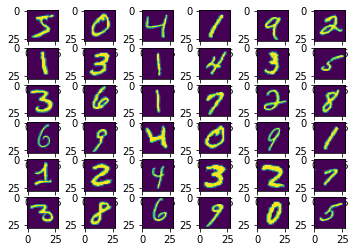

In [103]:
#Visualising MNIST dataset
fig,axs=plt.subplots(6,6)
k = 0
for i in range(6):
  for j in range(6):
    axs[i][j].imshow(x_train[k])
    k+=1
plt.show()

In [104]:
#Creating LSTM model
K=len(set(y_train))

inputs=Input(shape=(28,28))
layer=LSTM(128,activation="relu")(inputs)
layer=keras.layers.Dense(K,activation="softmax")(layer)
model=keras.models.Model(inputs,layer)

In [105]:
#Compile model
model.compile(optimizer="adam",
              loss = "sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [106]:
#Fit model
model.fit(
    x_train, y_train, validation_data=(x_test, y_test), epochs=3
)

Epoch 1/3
1875/1875 [==============================] - 50s 26ms/step - loss: 0.5782 - accuracy: 0.8119 - val_loss: 0.1482 - val_accuracy: 0.9557
Epoch 2/3
1875/1875 [==============================] - 48s 26ms/step - loss: 0.1241 - accuracy: 0.9623 - val_loss: 0.1048 - val_accuracy: 0.9659
Epoch 3/3
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0872 - accuracy: 0.9725 - val_loss: 0.0792 - val_accuracy: 0.9753


Predicted result is: 3, target result is: 3
Predicted result is: 4, target result is: 4
Predicted result is: 0, target result is: 0
Predicted result is: 9, target result is: 9
Predicted result is: 8, target result is: 8


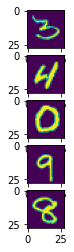

In [107]:
#Prediction
labels=[0,1,2,3,4,5,6,7,8,9]
imgset=np.random.randint(1000, size=(5))
fig2,axs2=plt.subplots(5)
for ind in range(len(imgset)):

  image_number=imgset[ind]
  axs2[ind].imshow(x_test[image_number])
  n=np.array(x_test[image_number])
  p=n.reshape(1,28,28,1)
  predicted_label=labels[model.predict(p).argmax()]
  original_label=labels[y_test[image_number]]
  
  print(
          "Predicted result is: %s, target result is: %s" % (predicted_label,original_label)
      )
